In [2]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from fractions import Fraction
# g=9.8, l=1.0, m₁=10.0, m₂=1.0
# stateSpaceBox =[position; velocity;  angle; angular_velocity]
# stateSpaceBox = [-2 +2;      -1 +1; 0 +2pi;        -4pi +4pi]
dyn = {"g":9.8, "m2": 1.0, "l": 1.0, "m1": 10.0}
x0 = np.array([0,0,0.1,0])
v1 = np.array([1, 0, 0, 0], dtype=np.float32)
v2 = np.array([0, 1, 0, 0], dtype=np.float32)
v3 = np.array([0, 0, 1, 0], dtype=np.float32)
v4 = np.array([0, 0, 0, 1], dtype=np.float32)
x_dot = []
x_norm = []

# cum = np.array([0,0,0])

# def cosin 

def cartpole (x0, dyn):
    g = dyn['g'] 
    l = dyn['l']
    m1 = dyn['m1']
    m2 = dyn['m2']
    #print (x0)
    f = np.array([x0[1],
                    (0.011*(x0[3]**2)*np.sin(x0[2]) + 0.098*np.cos(x0[2])*np.sin(x0[2])) / (0.01*(np.cos(x0[2])**2) - 0.22),
                    x0[3],
                    (-1.96*np.sin(x0[2]) - 0.01*(x0[3]**2)*np.cos(x0[2])*np.sin(x0[2])) / (0.01*(np.cos(x0[2])**2) - 0.22)
                    ], dtype=np.float32)
    g = np.array([0,
                  0.11 / (0.01*(np.cos(x0[2])**2) - 0.22),
                  0,
                  (-0.1*np.cos(x0[2])) / (0.01*(np.cos(x0[2])**2) - 0.22)
        
    ], dtype=np.float32)
    return f + g*0

def linearized_cartpole (x0, dyn, y_cartpole):
    g = dyn['g'] 
    l = dyn['l']
    m1 = dyn['m1']
    m2 = dyn['m2']
    led_cartpole = np.array([[0, 1, 0, 0],
                             [0, 0, (0.098*(np.cos(y_cartpole[2])**2) 
                                     + 0.011*(y_cartpole[3]**2)*np.cos(y_cartpole[2]) 
                                     - 0.098*(np.sin(y_cartpole[2])**2)) / (0.01*(np.cos(y_cartpole[2])**2) - 0.22) 
                              + 0.02*((0.011*(y_cartpole[3]**2)*np.sin(y_cartpole[2]) 
                                       + 0.098*np.cos(y_cartpole[2])*np.sin(y_cartpole[2])) / 
                                      ((0.01*(np.cos(y_cartpole[2])**2) - 0.22)**2))*np.cos(y_cartpole[2])*np.sin(y_cartpole[2]), 
                              (0.022*np.sin(y_cartpole[2])*y_cartpole[3]) / (0.01*(np.cos(y_cartpole[2])**2) - 0.22)],
                             [0, 0, 0, 1],
                             [0, 0, (0.01*(np.sin(y_cartpole[2])**2)*(y_cartpole[3]**2) - 1.96*np.cos(y_cartpole[2]) - 0.01*(np.cos(y_cartpole[2])**2)*(y_cartpole[3]**2)) / (0.01*(np.cos(y_cartpole[2])**2) - 0.22) + 0.02*((-1.96*np.sin(y_cartpole[2]) - 0.01*(y_cartpole[3]**2)*np.cos(y_cartpole[2])*np.sin(y_cartpole[2])) / ((0.01*(np.cos(y_cartpole[2])**2) - 0.22)**2))*np.cos(y_cartpole[2])*np.sin(y_cartpole[2]), (-0.02*np.cos(y_cartpole[2])*np.sin(y_cartpole[2])*y_cartpole[3]) / (0.01*(np.cos(y_cartpole[2])**2) - 0.22)]
                            ], dtype=np.float32)
    v = np.dot(x0,led_cartpole)
    return v


def RungeKutta (dyn, f, dt, x0):
    k1 = f(x0, dyn) #[x,y,z]*0.1 example
    k2 = f(x0+0.5*k1*dt,dyn)
    k3 = f(x0 + 0.5*k2*dt, dyn)
    k4 = f(x0 + k3*dt, dyn)
    
    x = x0 + ((k1 + 2*k2 + 2*k3 + k4)/6) *dt
    return x

def RungeKutta_linearized (dyn, f, dt, x0, y):
    k1 = f(x0, dyn, y) #[x,y,z]*0.1 example
    k2 = f(x0+0.5*k1*dt,dyn, y)
    k3 = f(x0 + 0.5*k2*dt, dyn, y)
    k4 = f(x0 + k3*dt, dyn, y)
    
    x = x0 + ((k1 + 2*k2 + 2*k3 + k4)/6) * dt

    return x


def f_t_le (dyn, f, linearized_f, dt, x0, T):
    x = np.empty(shape=(len(x0),T), dtype=np.float32)
    v1_prime = np.empty(shape=(len(x0),T), dtype=np.float32)
    v2_prime = np.empty(shape=(len(x0),T), dtype=np.float32)
    v3_prime = np.empty(shape=(len(x0),T), dtype=np.float32)
    v4_prime = np.empty(shape=(len(x0),T), dtype=np.float32)
    x[:, 0] = x0
    v1_prime[:, 0] = v1
    v2_prime[:, 0] = v2
    v3_prime[:, 0] = v3
    v4_prime[:, 0] = v4
    cum = np.array([0,0,0,0], dtype=np.float32)
    for i in range(1,T):
        x[:, i] = RungeKutta(dyn, f, dt, x[:, i-1])
        
        v1_prime[:, i] = RungeKutta_linearized(dyn, linearized_f, dt, v1_prime[:, i-1], x[:, i-1])
        v2_prime[:, i] = RungeKutta_linearized(dyn, linearized_f, dt, v2_prime[:, i-1], x[:, i-1])
        v3_prime[:, i] = RungeKutta_linearized(dyn, linearized_f, dt, v3_prime[:, i-1], x[:, i-1])
        v4_prime[:, i] = RungeKutta_linearized(dyn, linearized_f, dt, v4_prime[:, i-1], x[:, i-1])
        
#         print (v4_prime[:, i])
#         input()
        
        norm1 = np.linalg.norm(v1_prime[:, i])
        v1_prime[:, i] = v1_prime[:, i]/norm1
        
        GSC1 = np.dot(v1_prime[:, i], v2_prime[:, i])
        
        v2_prime[:, i] = v2_prime[:, i] - GSC1*v1_prime[:, i]
        norm2 = np.linalg.norm(v2_prime[:, i])
        v2_prime[:, i] = v2_prime[:, i]/norm2
        
        GSC2 = np.dot(v3_prime[:, i], v1_prime[:, i])
        GSC3 = np.dot(v3_prime[:, i], v2_prime[:, i])
        
        v3_prime[:, i] = v3_prime[:, i] - GSC2*v1_prime[:, i] - GSC3*v2_prime[:, i]
        norm3 = np.linalg.norm(v3_prime[:, i])
        v3_prime[:, i] = v3_prime[:, i]/norm3
        
        GSC4 = np.dot(v4_prime[:, i], v1_prime[:, i])
        GSC5 = np.dot(v4_prime[:, i], v2_prime[:, i])
        GSC6 = np.dot(v4_prime[:, i], v3_prime[:, i])
         
        v4_prime[:, i] = v4_prime[:, i] - GSC4*v1_prime[:, i] - GSC5*v2_prime[:, i] - GSC6*v3_prime[:, i]
        norm4 = np.linalg.norm(v4_prime[:, i])
        
        v4_prime[:, i] = v4_prime[:, i]/norm4
        
        cum = cum + np.log2(np.array([norm1,norm2,norm3,norm4]))
#         if ( i % 100 == 0 ):
#             print ('log2:', np.log2(np.array([norm1,norm2,norm3]))/(i*dt))
#             print ('cum:', cum/(i*dt))
        
    cum = cum/(T*dt)
    return max(cum)

def f_t (dyn, f, dt, x0, T):
    x = np.empty(shape=(len(x0),T))
    #print(x.shape)
    x[:, 0] = x0
    for i in range(1,T):
        x[:, i] = RungeKutta(dyn, f, dt, x[:, i-1])
    return x

In [4]:
le = f_t_le(dyn, cartpole, linearized_cartpole, 0.001, x0, 500)

In [5]:
le

2.4611568

Text(0.5, 0.98, 'Cartpole')

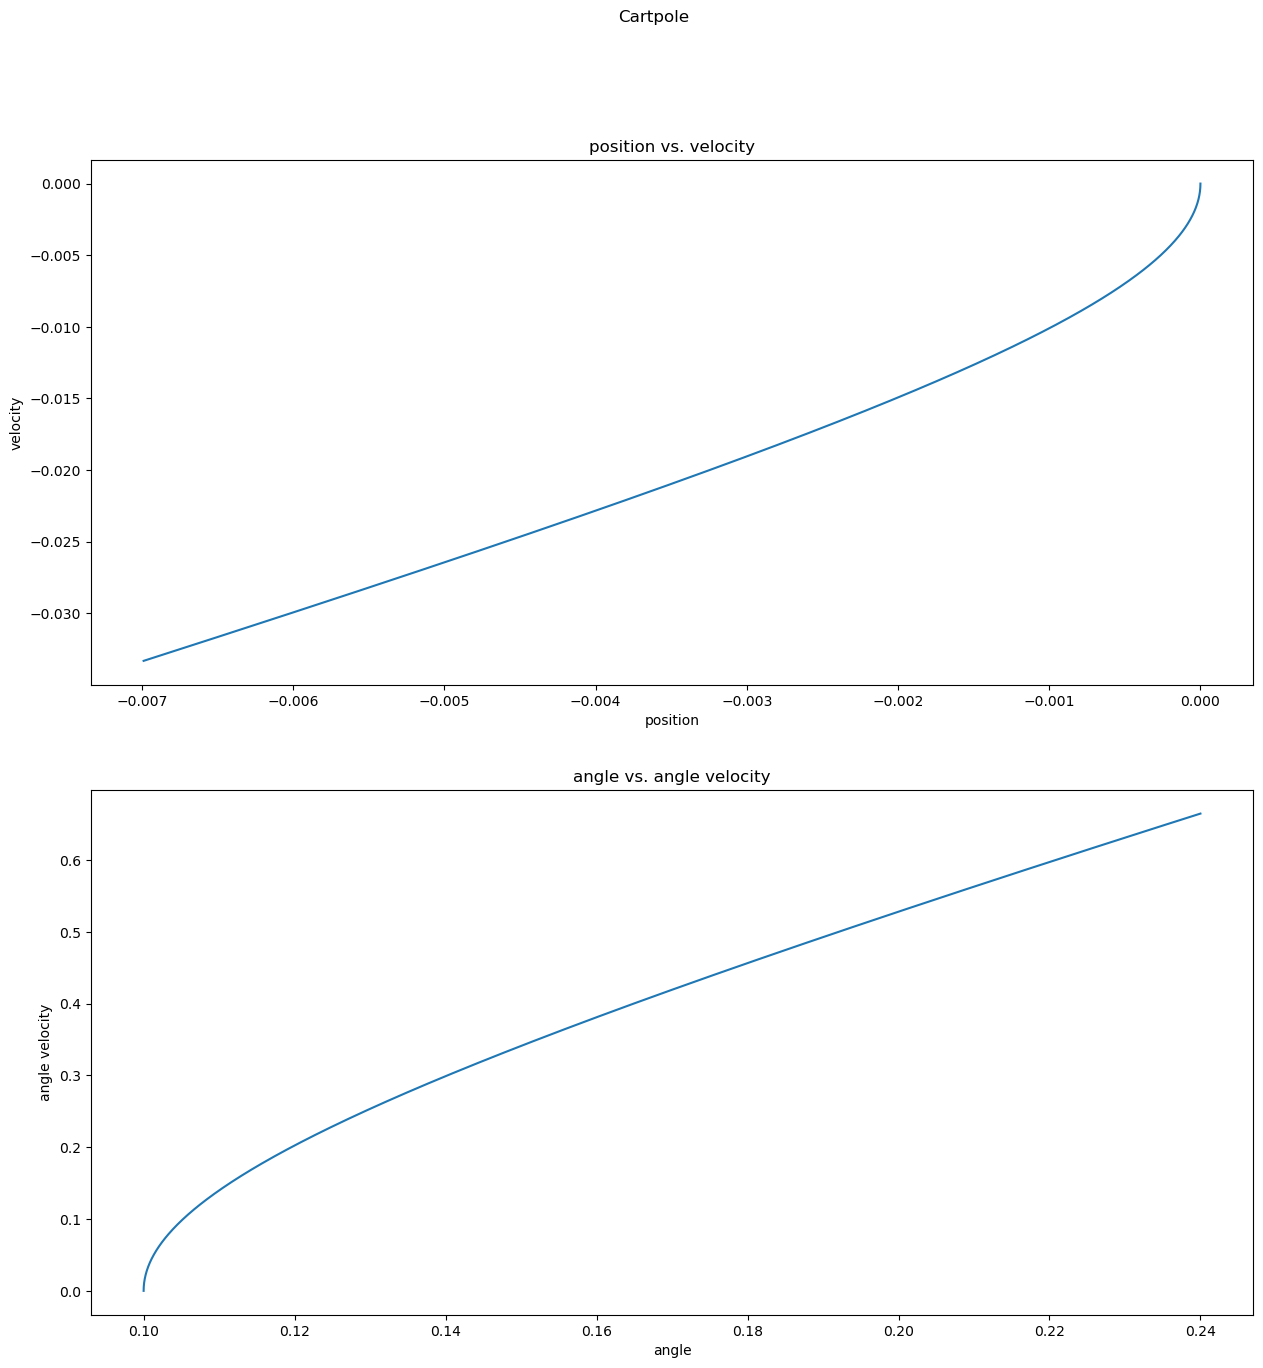

In [140]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(211)
ax.set_title('position vs. velocity')
ax.set_xlabel('position')
ax.set_ylabel('velocity')
plot = ax.plot(x[0],x[1])

ax1 = fig.add_subplot(212)
ax1.set_title('angle vs. angle velocity')
ax1.set_xlabel('angle')
ax1.set_ylabel('angle velocity')
plot = ax1.plot(x[2],x[3])

fig.suptitle('Cartpole')

In [129]:
# stateSpaceBox = [-2 +2;      -1 +1; 0 +2pi;        -4pi +4pi]
T = 350
test = np.array([  np.random.uniform(-2, 2, size=(500)), 
                 np.random.uniform(-1, 1, size=(500)),
                np.random.uniform(0, 2*np.pi, size=(500)),
                np.random.uniform(-8, 8, size=(500))])
# new_test = np.append(test.T,np.array([[np.pi,0]]),axis=0)

cum_list = []
for i in test.T:
#     x = f_t_le(dyn, cartpole, linearized_cartpole, 0.001, x0, 500)
    _, cum = f_t_le(dyn, cartpole, linearized_cartpole, 0.001, i, T)
    cum_list.append(cum)
zs = np.array([max(i) for i in cum_list])  


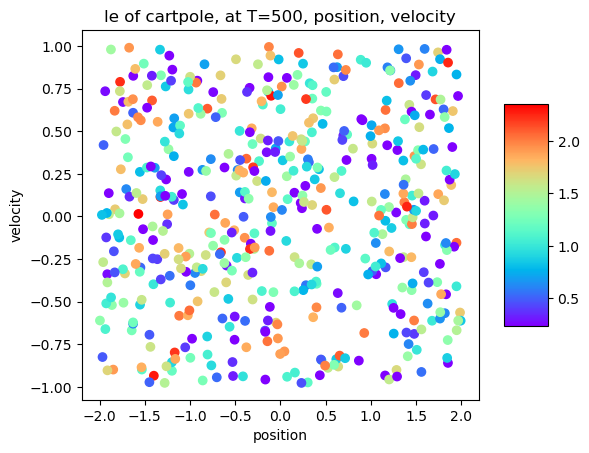

In [130]:
fig = plt.figure()
ax = fig.add_subplot(111)
plot1 = ax.scatter(test[0], test[1], c=zs, cmap=plt.cm.rainbow,vmin=zs.min(), vmax=zs.max())
cbar1 = fig.colorbar(plot1, shrink=0.6, aspect=5)
ax.set_xlabel('position')
ax.set_ylabel('velocity')
plt.title ('le of cartpole, at T=500, position, velocity')
plt.show()

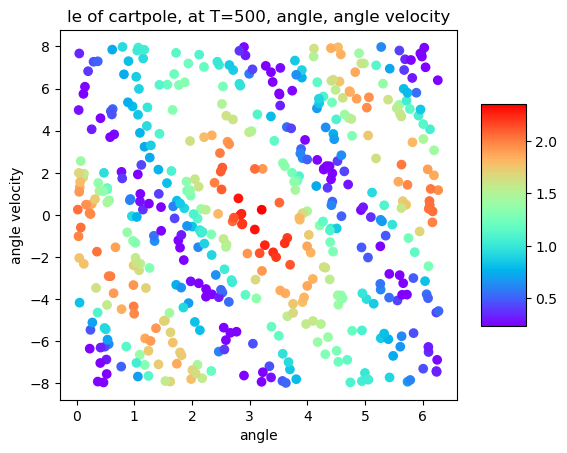

In [131]:
fig = plt.figure()
ax = fig.add_subplot(111)
plot1 = ax.scatter(test[2], test[3], c=zs, cmap=plt.cm.rainbow,vmin=zs.min(), vmax=zs.max())
cbar1 = fig.colorbar(plot1, shrink=0.6, aspect=5)
ax.set_xlabel('angle')
ax.set_ylabel('angle velocity')
plt.title ('le of cartpole, at T=500, angle, angle velocity')
plt.show()

In [45]:
X = np.array(np.meshgrid(np.arange(-2 , 2, 0.2),
                      np.arange(-1 , 1, 0.2),
                         np.arange(0 , 2*np.pi, 0.2),
                         np.arange(-8 , 8, 0.2)
                        ))

In [46]:
X_reshaped = X.T.reshape(X.T.shape[0]*X.T.shape[1]*X.T.shape[2]*X.T.shape[3],4)

In [47]:
X_reshaped.shape

(512000, 4)

In [48]:
512000/40

12800.0

Exception in thread Thread-9:
Traceback (most recent call last):
  File "/home/phu/Dropbox/general_backup/anaconda3/envs/gen_env/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/phu/Dropbox/general_backup/anaconda3/envs/gen_env/lib/python3.10/concurrent/futures/process.py", line 323, in run
    self.terminate_broken(cause)
  File "/home/phu/Dropbox/general_backup/anaconda3/envs/gen_env/lib/python3.10/concurrent/futures/process.py", line 458, in terminate_broken
    work_item.future.set_exception(bpe)
  File "/home/phu/Dropbox/general_backup/anaconda3/envs/gen_env/lib/python3.10/concurrent/futures/_base.py", line 561, in set_exception
    raise InvalidStateError('{}: {!r}'.format(self._state, self))
concurrent.futures._base.InvalidStateError: CANCELLED: <Future at 0x7f57ed1c6740 state=cancelled>


In [12]:
from scipy import spatial
from concurrent.futures import ProcessPoolExecutor
import concurrent

In [19]:
def cal_le (x):
    le = f_t_le(dyn, cartpole, linearized_cartpole, 0.001, x, 500)
    return (x, le)

In [20]:
points = list(X_reshaped)
le_collection_para = []
with ProcessPoolExecutor(max_workers=4) as executor:
    for r in executor.map(cal_le, points, chunksize=200):
        print("finished points:", r)
        le_collection_para.append(r)

finished points: (array([-2., -1.,  0., -8.]), 0.7685938)
finished points: (array([-2. , -0.9,  0. , -8. ]), 0.7685938)
finished points: (array([-2. , -0.8,  0. , -8. ]), 0.7685938)
finished points: (array([-2. , -0.7,  0. , -8. ]), 0.7685938)
finished points: (array([-2. , -0.6,  0. , -8. ]), 0.7685938)
finished points: (array([-2. , -0.5,  0. , -8. ]), 0.7685938)
finished points: (array([-2. , -0.4,  0. , -8. ]), 0.7685938)
finished points: (array([-2. , -0.3,  0. , -8. ]), 0.7685938)
finished points: (array([-2. , -0.2,  0. , -8. ]), 0.7685938)
finished points: (array([-2. , -0.1,  0. , -8. ]), 0.7685938)
finished points: (array([-2.00000000e+00, -2.22044605e-16,  0.00000000e+00, -8.00000000e+00]), 0.7685938)
finished points: (array([-2. ,  0.1,  0. , -8. ]), 0.7685938)
finished points: (array([-2. ,  0.2,  0. , -8. ]), 0.7685938)
finished points: (array([-2. ,  0.3,  0. , -8. ]), 0.7685938)
finished points: (array([-2. ,  0.4,  0. , -8. ]), 0.7685938)
finished points: (array([-2. ,

finished points: (array([-1., -1.,  0., -8.]), 0.7685938)
finished points: (array([-1. , -0.9,  0. , -8. ]), 0.7685938)
finished points: (array([-1. , -0.8,  0. , -8. ]), 0.7685938)
finished points: (array([-1. , -0.7,  0. , -8. ]), 0.7685938)
finished points: (array([-1. , -0.6,  0. , -8. ]), 0.7685938)
finished points: (array([-1. , -0.5,  0. , -8. ]), 0.7685938)
finished points: (array([-1. , -0.4,  0. , -8. ]), 0.7685938)
finished points: (array([-1. , -0.3,  0. , -8. ]), 0.7685938)
finished points: (array([-1. , -0.2,  0. , -8. ]), 0.7685938)
finished points: (array([-1. , -0.1,  0. , -8. ]), 0.7685938)
finished points: (array([-1.00000000e+00, -2.22044605e-16,  0.00000000e+00, -8.00000000e+00]), 0.7685938)
finished points: (array([-1. ,  0.1,  0. , -8. ]), 0.7685938)
finished points: (array([-1. ,  0.2,  0. , -8. ]), 0.7685938)
finished points: (array([-1. ,  0.3,  0. , -8. ]), 0.7685938)
finished points: (array([-1. ,  0.4,  0. , -8. ]), 0.7685938)
finished points: (array([-1. ,

finished points: (array([ 1., -1.,  0., -8.]), 0.7685938)
finished points: (array([ 1. , -0.9,  0. , -8. ]), 0.7685938)
finished points: (array([ 1. , -0.8,  0. , -8. ]), 0.7685938)
finished points: (array([ 1. , -0.7,  0. , -8. ]), 0.7685938)
finished points: (array([ 1. , -0.6,  0. , -8. ]), 0.7685938)
finished points: (array([ 1. , -0.5,  0. , -8. ]), 0.7685938)
finished points: (array([ 1. , -0.4,  0. , -8. ]), 0.7685938)
finished points: (array([ 1. , -0.3,  0. , -8. ]), 0.7685938)
finished points: (array([ 1. , -0.2,  0. , -8. ]), 0.7685938)
finished points: (array([ 1. , -0.1,  0. , -8. ]), 0.7685938)
finished points: (array([ 1.00000000e+00, -2.22044605e-16,  0.00000000e+00, -8.00000000e+00]), 0.7685938)
finished points: (array([ 1. ,  0.1,  0. , -8. ]), 0.7685938)
finished points: (array([ 1. ,  0.2,  0. , -8. ]), 0.7685938)
finished points: (array([ 1. ,  0.3,  0. , -8. ]), 0.7685938)
finished points: (array([ 1. ,  0.4,  0. , -8. ]), 0.7685938)
finished points: (array([ 1. ,


KeyboardInterrupt



In [36]:
le = f_t_le(dyn, cartpole, linearized_cartpole, 0.001, np.array([ 0,  0.9,  np.pi , 0.0 ]), 500)

In [37]:
le

3.1661081

In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from fractions import Fraction
from concurrent.futures import ProcessPoolExecutor
# g=9.8, l=1.0, m₁=10.0, m₂=1.0
# stateSpaceBox =[position; velocity;  angle; angular_velocity]
# stateSpaceBox = [-2 +2;      -1 +1; 0 +2pi;        -4pi +4pi]
dyn = {"g":9.8, "m2": 1.0, "l": 1.0, "m1": 10.0}
x0 = np.array([0,0,0.1,0])
v1 = np.array([1, 0, 0, 0], dtype=np.float32)
v2 = np.array([0, 1, 0, 0], dtype=np.float32)
v3 = np.array([0, 0, 1, 0], dtype=np.float32)
v4 = np.array([0, 0, 0, 1], dtype=np.float32)
x_dot = []
x_norm = []
# cum = np.array([0,0,0])

# def cosin 

def cartpole (x0, dyn):
    g = dyn['g'] 
    l = dyn['l']
    m1 = dyn['m1']
    m2 = dyn['m2']
    #print (x0)
    f = np.array([x0[1],
                    (0.011*(x0[3]**2)*np.sin(x0[2]) + 0.098*np.cos(x0[2])*np.sin(x0[2])) / (0.01*(np.cos(x0[2])**2) - 0.22),
                    x0[3],
                    (-1.96*np.sin(x0[2]) - 0.01*(x0[3]**2)*np.cos(x0[2])*np.sin(x0[2])) / (0.01*(np.cos(x0[2])**2) - 0.22)
                    ], dtype=np.float32)
    g = np.array([0,
                  0.11 / (0.01*(np.cos(x0[2])**2) - 0.22),
                  0,
                  (-0.1*np.cos(x0[2])) / (0.01*(np.cos(x0[2])**2) - 0.22)
        
    ], dtype=np.float32)
    return f + g*0

def linearized_cartpole (x0, dyn, y_cartpole):
    g = dyn['g'] 
    l = dyn['l']
    m1 = dyn['m1']
    m2 = dyn['m2']
    led_cartpole = np.array([[0, 1, 0, 0],
                             [0, 0, (0.098*(np.cos(y_cartpole[2])**2) 
                                     + 0.011*(y_cartpole[3]**2)*np.cos(y_cartpole[2]) 
                                     - 0.098*(np.sin(y_cartpole[2])**2)) / (0.01*(np.cos(y_cartpole[2])**2) - 0.22) 
                              + 0.02*((0.011*(y_cartpole[3]**2)*np.sin(y_cartpole[2]) 
                                       + 0.098*np.cos(y_cartpole[2])*np.sin(y_cartpole[2])) / 
                                      ((0.01*(np.cos(y_cartpole[2])**2) - 0.22)**2))*np.cos(y_cartpole[2])*np.sin(y_cartpole[2]), 
                              (0.022*np.sin(y_cartpole[2])*y_cartpole[3]) / (0.01*(np.cos(y_cartpole[2])**2) - 0.22)],
                             [0, 0, 0, 1],
                             [0, 0, (0.01*(np.sin(y_cartpole[2])**2)*(y_cartpole[3]**2) - 1.96*np.cos(y_cartpole[2]) - 0.01*(np.cos(y_cartpole[2])**2)*(y_cartpole[3]**2)) / (0.01*(np.cos(y_cartpole[2])**2) - 0.22) + 0.02*((-1.96*np.sin(y_cartpole[2]) - 0.01*(y_cartpole[3]**2)*np.cos(y_cartpole[2])*np.sin(y_cartpole[2])) / ((0.01*(np.cos(y_cartpole[2])**2) - 0.22)**2))*np.cos(y_cartpole[2])*np.sin(y_cartpole[2]), (-0.02*np.cos(y_cartpole[2])*np.sin(y_cartpole[2])*y_cartpole[3]) / (0.01*(np.cos(y_cartpole[2])**2) - 0.22)]
                            ], dtype=np.float32)
    v = np.dot(x0,led_cartpole)
    return v


def RungeKutta (dyn, f, dt, x0):
    k1 = f(x0, dyn) #[x,y,z]*0.1 example
    k2 = f(x0+0.5*k1*dt,dyn)
    k3 = f(x0 + 0.5*k2*dt, dyn)
    k4 = f(x0 + k3*dt, dyn)
    
    x = x0 + ((k1 + 2*k2 + 2*k3 + k4)/6) *dt
    return x

def RungeKutta_linearized (dyn, f, dt, x0, y):
    k1 = f(x0, dyn, y) #[x,y,z]*0.1 example
    k2 = f(x0+0.5*k1*dt,dyn, y)
    k3 = f(x0 + 0.5*k2*dt, dyn, y)
    k4 = f(x0 + k3*dt, dyn, y)
    
    x = x0 + ((k1 + 2*k2 + 2*k3 + k4)/6) * dt

    return x


def f_t_le (dyn, f, linearized_f, dt, x0, T):
    x = np.empty(shape=(len(x0),T), dtype=np.float32)
    v1_prime = np.empty(shape=(len(x0),T), dtype=np.float32)
    v2_prime = np.empty(shape=(len(x0),T), dtype=np.float32)
    v3_prime = np.empty(shape=(len(x0),T), dtype=np.float32)
    v4_prime = np.empty(shape=(len(x0),T), dtype=np.float32)
    x[:, 0] = x0
    v1_prime[:, 0] = v1
    v2_prime[:, 0] = v2
    v3_prime[:, 0] = v3
    v4_prime[:, 0] = v4
    cum = np.array([0,0,0,0], dtype=np.float32)
    for i in range(1,T):
        x[:, i] = RungeKutta(dyn, f, dt, x[:, i-1])
        
        v1_prime[:, i] = RungeKutta_linearized(dyn, linearized_f, dt, v1_prime[:, i-1], x[:, i-1])
        v2_prime[:, i] = RungeKutta_linearized(dyn, linearized_f, dt, v2_prime[:, i-1], x[:, i-1])
        v3_prime[:, i] = RungeKutta_linearized(dyn, linearized_f, dt, v3_prime[:, i-1], x[:, i-1])
        v4_prime[:, i] = RungeKutta_linearized(dyn, linearized_f, dt, v4_prime[:, i-1], x[:, i-1])
        
#         print (v4_prime[:, i])
#         input()
        
        norm1 = np.linalg.norm(v1_prime[:, i])
        v1_prime[:, i] = v1_prime[:, i]/norm1
        
        GSC1 = np.dot(v1_prime[:, i], v2_prime[:, i])
        
        v2_prime[:, i] = v2_prime[:, i] - GSC1*v1_prime[:, i]
        norm2 = np.linalg.norm(v2_prime[:, i])
        v2_prime[:, i] = v2_prime[:, i]/norm2
        
        GSC2 = np.dot(v3_prime[:, i], v1_prime[:, i])
        GSC3 = np.dot(v3_prime[:, i], v2_prime[:, i])
        
        v3_prime[:, i] = v3_prime[:, i] - GSC2*v1_prime[:, i] - GSC3*v2_prime[:, i]
        norm3 = np.linalg.norm(v3_prime[:, i])
        v3_prime[:, i] = v3_prime[:, i]/norm3
        
        GSC4 = np.dot(v4_prime[:, i], v1_prime[:, i])
        GSC5 = np.dot(v4_prime[:, i], v2_prime[:, i])
        GSC6 = np.dot(v4_prime[:, i], v3_prime[:, i])
         
        v4_prime[:, i] = v4_prime[:, i] - GSC4*v1_prime[:, i] - GSC5*v2_prime[:, i] - GSC6*v3_prime[:, i]
        norm4 = np.linalg.norm(v4_prime[:, i])
        
        v4_prime[:, i] = v4_prime[:, i]/norm4
        
        cum = cum + np.log2(np.array([norm1,norm2,norm3,norm4]))
#         if ( i % 100 == 0 ):
#             print ('log2:', np.log2(np.array([norm1,norm2,norm3]))/(i*dt))
#             print ('cum:', cum/(i*dt))
        
    cum = cum/(T*dt)
    return max(cum)

def f_t (dyn, f, dt, x0, T):
    x = np.empty(shape=(len(x0),T))
    #print(x.shape)
    x[:, 0] = x0
    for i in range(1,T):
        x[:, i] = RungeKutta(dyn, f, dt, x[:, i-1])
    return x

def cal_le (x):
    return f_t_le(dyn, cartpole, linearized_cartpole, 0.001, x, 500)

X = np.array(np.meshgrid(np.arange(-2 , 2, 0.1),
                      np.arange(-1 , 1, 0.1),
                         np.arange(0 , 2*np.pi, 0.1),
                         np.arange(-8 , 8, 0.1)
                        ))


X_reshaped = X.T.reshape(X.T.shape[0]*X.T.shape[1]*X.T.shape[2]*X.T.shape[3],4)

np.save('points', X_reshaped)

points = list(X_reshaped)
le_collection_para = []
with ProcessPoolExecutor() as executor:
    for r in executor.map(cal_le, points):
        print ('finished points:', points)
        le_collection_para.append(r)

np.save('precal_le', le_collection_para)